Now we have a dataset composed of 3D lung CT scans with begnin and malign tumors that we need to classify using deep learning methods.

In [1]:
from keras import backend as K
K.clear_session()
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
import keras
import numpy as np
from keras import layers
from keras import models
import os
import scipy.io
from scipy.io import loadmat
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import regularizers

Using TensorFlow backend.


In [2]:
#Getting the benign dataset
dataDir_benign = r'C:\Users\p-emm\Desktop\Stage_M1\Base_de_données\LIDC seg data\Benign\Benign'
X_benign = []
Y_b = []
for file in os.listdir( dataDir_benign ) :
    data = loadmat( dataDir_benign + '\\'+file )
    X_benign.append(data['TDM_VOI'])
    Y_b.append(data['Type_lable'])

Y_benign = []
for element in Y_b:
    Y_benign.append(element[0][0])

In [3]:
#Getting the malign dataset
dataDir_malign = r'C:\Users\p-emm\Desktop\Stage_M1\Base_de_données\LIDC seg data\Malignancy\Malignancy'
X_malign = []
Y_m = []
for file in os.listdir( dataDir_malign ) :
    data = loadmat( dataDir_malign + '\\'+file )
    X_malign.append(data['TDM_VOI'])
    Y_m.append(data['Type_lable'])
    
    
    
Y_malign = []
for element in Y_m:
    Y_malign.append(element[0][0])

In [4]:
#Splitting into training and test sets
X = X_benign + X_malign
Y = Y_benign + Y_malign
X = np.array(X)
Y=np.array(Y)

X = np.expand_dims(X, axis = 4)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=5,shuffle=True,stratify=Y)

In [5]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Building the architecture of the deep learning algorithm

In [6]:
# (1) Importing dependency
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv3D, MaxPooling3D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv3D(filters=96,kernel_regularizer=regularizers.l2(0.002), input_shape=(64,64,64,1), kernel_size=(3,3,3),strides=(2,2,2), data_format ="channels_last", padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2), padding='valid', data_format = "channels_last"))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# 2nd Convolutional Layer
model.add(Conv3D(filters=256,kernel_regularizer=regularizers.l2(0.002), kernel_size=(3,3,3), strides=(1,1,1), padding='valid',data_format = "channels_last"))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2), padding='valid', data_format = "channels_last"))
# Batch Normalisation
model.add(BatchNormalization())

In [8]:
# 3rd Convolutional Layer
model.add(Conv3D(filters=384,kernel_regularizer=regularizers.l2(0.002), kernel_size=(3,3,3), strides=(1,1,1), padding='valid', data_format = "channels_last"))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

In [ ]:
# # 4th Convolutional Layer
# model.add(Conv3D(filters=384,kernel_regularizer=regularizers.l2(0.002), kernel_size=(2,2,2), strides=(1,1,1), padding='valid', data_format = "channels_last"))
# model.add(Activation('relu'))
# # Batch Normalisation
# model.add(BatchNormalization())

In [9]:
# 5th Convolutional Layer
model.add(Conv3D(filters=256,kernel_regularizer=regularizers.l2(0.002), kernel_size=(2,2,2), strides=(1,1,1), padding='valid', data_format = "channels_last"))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling3D(pool_size=(2,2,2), strides=(1,1,1), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

In [10]:
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(1000, kernel_regularizer=regularizers.l2(0.002), input_shape=(64*64*64*1,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(rate = 0.5))
# Batch Normalisation
model.add(BatchNormalization())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# 2nd Dense Layer
model.add(Dense(1000, kernel_regularizer=regularizers.l2(0.002)))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(rate = 0.5))
# Batch Normalisation
model.add(BatchNormalization())

In [12]:
# 3rd Dense Layer
model.add(Dense(500, kernel_regularizer=regularizers.l2(0.002)))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(rate = 0.5))
# Batch Normalisation
model.add(BatchNormalization())

In [13]:
# Output Layer
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 31, 31, 31, 96)    2688      
_________________________________________________________________
activation_1 (Activation)    (None, 31, 31, 31, 96)    0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 15, 15, 15, 96)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 15, 96)    384       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 13, 13, 13, 256)   663808    
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 13, 256)   0         
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 6, 6, 6, 256)      0         
__________

In [14]:
from keras import optimizers

In [15]:
# (4) Compile 
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=3e-5),metrics=['accuracy'])

In [16]:
# (5) Train
history = model.fit(X_train, Y_train, batch_size=30, epochs=10, verbose=1, validation_split=0.15, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 935 samples, validate on 165 samples
Epoch 1/10
935/935 [==============================] - 339s 362ms/step - loss: 8.3649 - acc: 0.5353 - val_loss: 8.0743 - val_acc: 0.7515
Epoch 2/10
935/935 [==============================] - 332s 355ms/step - loss: 8.2296 - acc: 0.6134 - val_loss: 8.0335 - val_acc: 0.7636
Epoch 3/10
935/935 [==============================] - 341s 365ms/step - loss: 8.1454 - acc: 0.6604 - val_loss: 7.9881 - val_acc: 0.7788
Epoch 4/10
935/935 [==============================] - 350s 374ms/step - loss: 8.1086 - acc: 0.6674 - val_loss: 7.9589 - val_acc: 0.7788
Epoch 5/10
935/935 [==============================] - 352s 377ms/step - loss: 8.0702 - acc: 0.6941 - val_loss: 7.9163 - val_acc: 0.7909
Epoch 6/10
935/935 [==============================] - 345s 369ms/step - loss: 8.0129 - acc: 0.7187 - val_loss: 7.8847 - val_acc: 0.8212
Epoch 7/10
935/935 [==============================] - 331s 354ms/step - loss: 7.9717 - acc

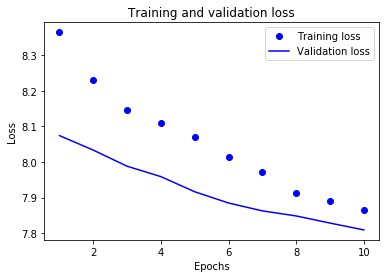

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

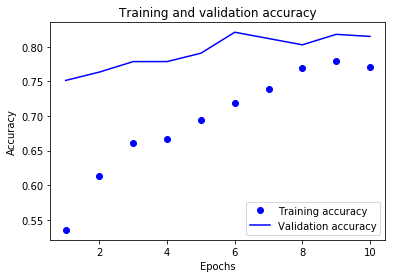

In [19]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

In [20]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('test_acc:', test_acc)

276/276 [==============================] - 30s 108ms/step
test_acc: 0.8695652165274689


In [22]:
### RECALL -- MINIMIZING THE NUMBER OF FALSE NEGATIVES

from sklearn.metrics import recall_score
Y_pred = model.predict(X_test, batch_size = 30)
Y_test = np.argmax( Y_test ,axis=1)
Y_pred = np.argmax( Y_pred ,axis=1)
print(recall_score(Y_test, Y_pred))

0.7575757575757576


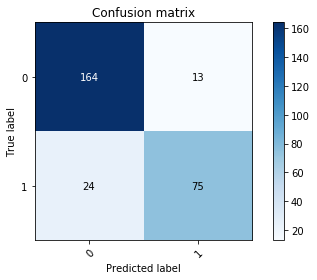

In [23]:
### PLOT THE CONFUSION MATRIX

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(Y_test, Y_pred,title='Confusion matrix')